In [2]:
import pandas as pd
import numpy as np

In [3]:
from collections import Counter

In [100]:
e_lisa = pd.read_csv('./blackpink/elle_L.csv', sep='|', encoding = 'utf-8')
c_lisa = pd.read_csv('./blackpink/cosmo_L.csv', sep='|', encoding = 'utf-8')
m_lisa = pd.read_csv('./blackpink/marie_L.csv', sep='|', encoding = 'utf-8')

In [101]:
mag_lisa = pd.concat([e_lisa, c_lisa, m_lisa])

In [102]:
mag_lisa.reset_index(drop=True, inplace = True)

## 전처리

### 기호 삭제

In [159]:
mag_lisa['word_lisa'] = mag_lisa['word_lisa'].str.replace('[', '').str.replace(']', '').str.replace('\\', '').str.replace('"', '').str.replace("'", "").str.replace('「', '').str.replace('」', '').str.replace('”', '').str.replace('‘', '').str.replace('“', '')

In [160]:
mag_lisa['word_lisa'][0]

'시어한 소재의 아가일 패턴 블라우스에 레터링 장식 톱과 펑키한 무드의 액세서리를 레이어드해 개성을 더한 리사.'

## 디자이너나 브랜드명 replace

### 블랙핑크 BLACKPINK

In [218]:
for word in mag_lisa['word_lisa']:
    if '블랙' in word:
        print(word)
        print('-'*50)

, , 주름 장식과 상반된 소재 매치, 독특한 커팅 등 볼거리가 풍성한 블랙 룩을 선보인 리사. 트렌디한 청키 체인 네크리스와 스퀘어 토 부츠까지 더한 빈틈없는 연출이 눈에 띕니다., , 치명미 한도 초과! 한예슬은 과감하게 파인 네크 라인과 파워 숄더를 장착한 마이크로 미니드레스를 선택했어요. 길게 늘어뜨린 스트레이트 뱅 헤어도 관능적인 분위기에 잘 어울립니다., , 평범한 아이템도 블랙으로 통일하면 색다른 분위기를 연출합니다. 기분 좋은 레터링 티셔츠와 블랙 팬츠, 컨버스 슈즈로꾸안꾸 데일리 룩의 정석을 보여준 슬기처럼 말이에요., , 목선과 어깨, 허리와 허벅지 등 스킨을 적당히 드러낸 스타일을 선보인 로제. 이번 시즌 핫’ 아이템인 롱 글러브와 체인 네크리스까지 섭렵했어요., , 컴뱃 부츠는 선미의 시그너처 아이템이죠. 그는 스터드 장식의 원피스와 투박한 부츠, 인더스트리얼 요소를 더한 백으로 락시크 분위기 완성했어요., , 블랙 컬러를 페미닌하게 소화하고 싶다면 단순한 캐미솔과 넓게 퍼지는 튤 스커트로 발레리나 같은 블랙 룩을 선보인 황승언의 스타일을 참고하세요. 와이드 벨트나 컴뱃 부츠를 믹스매치해 현실감 있게 소화했어요., , 퍼프 숄더의 크롭트 블라우스와 잘록한 허리 라인을 연출할 수 있는 벨티드 하이웨이스트 팬츠로 실루엣의 미학을 보여준 효민. 미니멀한 디자인의 핸드백으로 통일감 있게 마무리했어요.
--------------------------------------------------
, , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , , 인비테이션은 새롭게 선보이는 컬렉션을 짐작하게 하는 힌트와 같다. 쇼 시작 전 호텔로 도착한 프라다 인비테이션은 사각 박스로, 케이스를 열자 블랙과 레드가 컬러 매치된 하드 카피가 들어 있었다. 쇼장에 들어서는 순간, 인비테이션이 무대의 축소판이라는 걸 알 수 있었다. 2020 F/W 프라다 컬렉션이 열린 폰다지오네 프라다’가 렘 쿨하스

In [190]:
mag_lisa['word_lisa'] = mag_lisa['word_lisa'].str.replace('블랙핑크', 'BLACKPINK')

### 샤넬

In [163]:
for word in mag_lisa['word_lisa']:
    if '셀린' in word:
        print(word)
        print('-'*50)

In [164]:
mag_lisa['word_lisa'] = mag_lisa['word_lisa'].str.replace('샤넬', 'CHANEL')

In [165]:
# 디올
mag_lisa['word_lisa'] = mag_lisa['word_lisa'].str.replace('디올', 'DIOR')

In [166]:
# 셀린느
mag_lisa['word_lisa'] = mag_lisa['word_lisa'].str.replace('셀린느', 'CELINE')


In [167]:
# 셀린
mag_lisa['word_lisa'] = mag_lisa['word_lisa'].str.replace('셀린', 'CELINE')

In [168]:
# 생로랑
mag_lisa['word_lisa'] = mag_lisa['word_lisa'].str.replace('생 로랑', 'SAINTLAURENT')
mag_lisa['word_lisa'] = mag_lisa['word_lisa'].str.replace('생로랑', 'SAINTLAURENT')

## list(article_list) 생성 후 append

In [169]:
contents_list = []

In [191]:
article_list = []
for word in mag_lisa['word_lisa']:
    article_list.append(word)

In [192]:
len(article_list)

71

## 트위터 패키지 안에 konlpy 모듈 호출

In [193]:
from konlpy.tag import Twitter

In [194]:
twitter = Twitter()

### 각 문장별로 형태소 구분하기

In [195]:
sentences_tag = []

for sentence in article_list:
    morph = twitter.pos(sentence)
    sentences_tag.append(morph)
    
    

print(len(sentences_tag))


71


In [196]:
sentences_tag[0]

[('시어', 'Noun'),
 ('한', 'Josa'),
 ('소재', 'Noun'),
 ('의', 'Josa'),
 ('아가', 'Noun'),
 ('일', 'Noun'),
 ('패턴', 'Noun'),
 ('블라우스', 'Noun'),
 ('에', 'Josa'),
 ('레터', 'Noun'),
 ('링', 'Noun'),
 ('장식', 'Noun'),
 ('톱', 'Noun'),
 ('과', 'Josa'),
 ('펑키', 'Noun'),
 ('한', 'Josa'),
 ('무드', 'Noun'),
 ('의', 'Josa'),
 ('액세서리', 'Noun'),
 ('를', 'Josa'),
 ('레이어', 'Noun'),
 ('드해', 'Noun'),
 ('개성', 'Noun'),
 ('을', 'Josa'),
 ('더한', 'Adjective'),
 ('리사', 'Noun'),
 ('.', 'Punctuation')]

In [197]:
twitter.tagset

{'Adjective': '형용사',
 'Adverb': '부사',
 'Alpha': '알파벳',
 'Conjunction': '접속사',
 'Determiner': '관형사',
 'Eomi': '어미',
 'Exclamation': '감탄사',
 'Foreign': '외국어, 한자 및 기타기호',
 'Hashtag': '트위터 해쉬태그',
 'Josa': '조사',
 'KoreanParticle': '(ex: ㅋㅋ)',
 'Noun': '명사',
 'Number': '숫자',
 'PreEomi': '선어말어미',
 'Punctuation': '구두점',
 'ScreenName': '트위터 아이디',
 'Suffix': '접미사',
 'Unknown': '미등록어',
 'Verb': '동사'}

### stopword 추가

In [249]:
sw_df = pd.read_csv('stopwords.csv', header=None)

In [250]:
sw_df.columns = ['stopword']

In [251]:
stop_words = []
for sw in sw_df['stopword']:
    stop_words.append(sw)

In [252]:
print(len(stop_words))
print(type(stop_words))

675
<class 'list'>


In [253]:
stop_words[-10:]

['둘', '셋', '넷', '다섯', '여섯', '일곱', '여덟', '아홉', '령', '영']

In [254]:
add_0 = ['것', '수', '때', '의', '있는', '더', '그', 'I', '위', '전', 
         '이', '같은', '제', '〉', 'a', 'to', '〈', '것']
for w in add_0:
    stop_words.append(w)

### 1. 명사, 형용사, 관형사, 알파벳, 외국어 품사만 선별해 리스트에 담기

In [262]:
noun_adj_list= []
for sentence1 in sentences_tag:
    for word, tag in sentence1:
        if tag in ['Noun', 'Adjective', 'Alpha', 'Determiner', 'Foreign']:
            if not word in stop_words:
                noun_adj_list.append(word)

In [263]:
len(noun_adj_list)

5105

In [264]:
noun_adj_list[:20]

['시어',
 '소재',
 '아가',
 '패턴',
 '블라우스',
 '레터',
 '링',
 '장식',
 '톱',
 '펑키',
 '무드',
 '액세서리',
 '레이어',
 '드해',
 '개성',
 '더한',
 '리사',
 'MAC',
 '브랜드',
 '앰배서더']

In [265]:
noun_adj_list[:10]

['시어', '소재', '아가', '패턴', '블라우스', '레터', '링', '장식', '톱', '펑키']

### 선별된 품사별 빈도수 계산 & 상위 빈도 10위까지 출력

In [266]:
word = Counter(noun_adj_list)
print(word.most_common(200))

[('리사', 158), ('BLACKPINK', 60), ('제니', 41), ('블랙', 37), ('룩', 35), ('로제', 35), ('지수', 35), ('컬러', 33), ('걸', 27), ('부츠', 24), ('톱', 22), ('메이크업', 21), ('멤버', 20), ('모습', 20), ('프라다', 20), ('매치', 18), ('레드', 18), ('and', 17), ('스타', 17), ('백', 17), ('있어요', 17), ('장식', 16), ('패션', 16), ('포인트', 16), ('재킷', 16), ('말', 16), ('스커트', 16), ('선택', 15), ('무대', 15), ('비즈', 14), ('MAC', 13), ('해', 13), ('the', 13), ('같아요', 13), ('사진', 13), ('지금', 13), ('그녀', 13), ('매력', 13), ('레더', 13), ('라인', 12), ('스타일', 12), ('요', 12), ('you', 11), ('of', 11), ('입술', 11), ('엘르', 11), ('속', 11), ('K', 11), ('사람', 11), ('in', 10), ('립스틱', 10), ('거', 10), ('CELINE', 10), ('완성', 10), ('음악', 10), ('드레스', 10), ('쇼', 10), ('화이트', 10), ('가장', 10), ('생각', 10), ('소재', 9), ('패턴', 9), ('that', 9), ('시도', 9), ('by', 9), ('크롭트', 9), ('분위기', 9), ('팬츠', 9), ('미니', 9), ('골드', 9), ('연출', 9), ('커버', 9), ('중', 9), ('데뷔', 9), ('게', 9), ('언니', 9), ('꿈', 8), ('시작', 8), ('촬영', 8), ('다양한', 8), ('립', 8), ('필름', 8), ('체인', 8), ('목걸이', 8

In [267]:
# # 한 글자인 단어는 제외

# for i, v in enumerate(noun_adj_list):
#     if len(v)<2:
#         noun_adj_list.pop(i)

In [268]:
count = Counter(noun_adj_list)

In [269]:
word_list = count.most_common(200)
for v in word_list:
    print(v)

('리사', 158)
('BLACKPINK', 60)
('제니', 41)
('블랙', 37)
('룩', 35)
('로제', 35)
('지수', 35)
('컬러', 33)
('걸', 27)
('부츠', 24)
('톱', 22)
('메이크업', 21)
('멤버', 20)
('모습', 20)
('프라다', 20)
('매치', 18)
('레드', 18)
('and', 17)
('스타', 17)
('백', 17)
('있어요', 17)
('장식', 16)
('패션', 16)
('포인트', 16)
('재킷', 16)
('말', 16)
('스커트', 16)
('선택', 15)
('무대', 15)
('비즈', 14)
('MAC', 13)
('해', 13)
('the', 13)
('같아요', 13)
('사진', 13)
('지금', 13)
('그녀', 13)
('매력', 13)
('레더', 13)
('라인', 12)
('스타일', 12)
('요', 12)
('you', 11)
('of', 11)
('입술', 11)
('엘르', 11)
('속', 11)
('K', 11)
('사람', 11)
('in', 10)
('립스틱', 10)
('거', 10)
('CELINE', 10)
('완성', 10)
('음악', 10)
('드레스', 10)
('쇼', 10)
('화이트', 10)
('가장', 10)
('생각', 10)
('소재', 9)
('패턴', 9)
('that', 9)
('시도', 9)
('by', 9)
('크롭트', 9)
('분위기', 9)
('팬츠', 9)
('미니', 9)
('골드', 9)
('연출', 9)
('커버', 9)
('중', 9)
('데뷔', 9)
('게', 9)
('언니', 9)
('꿈', 8)
('시작', 8)
('촬영', 8)
('다양한', 8)
('립', 8)
('필름', 8)
('체인', 8)
('목걸이', 8)
('눈', 8)
('아이템', 8)
('좋은', 8)
('티셔츠', 8)
('듯', 8)
('니트', 8)
('데님', 8)
('안', 8)
('정

## 워드클라우드 만들기

In [243]:

import matplotlib.pyplot as plt

### 패키지 설치 및 폰트 어쩌구

In [244]:
import matplotlib.font_manager as fm

# 이용 가능한 폰트 중 '고딕'만 선별
for font in fm.fontManager.ttflist:
    if 'Gothic' in font.name:
        print(font.name, font.fname)

Malgun Gothic C:\WINDOWS\Fonts\malgun.ttf
Yu Gothic C:\WINDOWS\Fonts\YuGothB.ttc
HYGothic-Extra C:\WINDOWS\Fonts\H2GTRE.TTF
Franklin Gothic Medium C:\WINDOWS\Fonts\framdit.ttf
Malgun Gothic C:\Windows\Fonts\malgunbd.ttf
Yu Gothic C:\Windows\Fonts\YuGothL.ttc
Century Gothic C:\Windows\Fonts\GOTHIC.TTF
Yu Gothic C:\Windows\Fonts\YuGothM.ttc
Yu Gothic C:\WINDOWS\Fonts\YuGothR.ttc
MS Gothic C:\WINDOWS\Fonts\msgothic.ttc
HYGothic-Medium C:\WINDOWS\Fonts\H2GTRM.TTF
Malgun Gothic C:\WINDOWS\Fonts\malgunsl.ttf
Century Gothic C:\Windows\Fonts\GOTHICI.TTF
Century Gothic C:\WINDOWS\Fonts\GOTHICBI.TTF
Century Gothic C:\Windows\Fonts\GOTHICB.TTF
Franklin Gothic Medium C:\WINDOWS\Fonts\framd.ttf


In [245]:
font_path = 'C:\WINDOWS\Fonts\malgun.ttf'

### wordcloud 그리기

In [246]:
from wordcloud import WordCloud

In [247]:
wc = WordCloud(font_path=font_path, background_color="white", width=600, height=400)

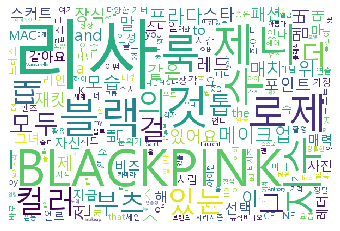

In [248]:
wc.generate_from_frequencies(dict(word_list))

plt.imshow(wc) 
plt.axis('off') 
plt.show()


wc.to_file('lisa_adj_twitter.png')